In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
from sklearn.impute import SimpleImputer

In [94]:
netflix = pd.read_csv("/content/netflix_titles.csv")
netflix.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


## **Data Exploration & Preporcessing**

In [ ]:
#Turning the date into weekday
netflix['date_added'] = pd.to_datetime(netflix['date_added'])
netflix['date_added'] = netflix['date_added'].dt.strftime('%Y-%m-%d')
netflix['weekday_added'] = pd.to_datetime(netflix['date_added']).dt.day_name()
netflix

In [96]:
netflix.duplicated().sum()

0

In [97]:
netflix.isnull().sum()

show_id             0
type                0
title               0
director         2389
cast              718
country           507
date_added         10
release_year        0
rating              7
duration            0
listed_in           0
description         0
weekday_added      10
dtype: int64

In [98]:
#Finding the percentage of missing values
print('Finding the % of missing values from total')
missing_values = (netflix.isnull().sum()/len(netflix))*100
missing_values

Finding the % of missing values from total


show_id           0.000000
type              0.000000
title             0.000000
director         30.679337
cast              9.220496
country           6.510851
date_added        0.128419
release_year      0.000000
rating            0.089893
duration          0.000000
listed_in         0.000000
description       0.000000
weekday_added     0.128419
dtype: float64

 Missing values and dropped columns

 - show_id: Not important, dropping this
 - director: There are too many missing values and its not very important either, dropping
 - cast: There are too many different values in a cell, dropping
 - country: I want to use this variable in my analysis, fixing it
 - date_added: Important for analysi, fixing it (using mode)
 - rating: only few missing values, fixing it
 - description: Too long and not neeed, dropping


(will only be imputing values if there are 0-20% of missing values)

In [99]:
#these are categorical variables so we will use mode.

impute = SimpleImputer(strategy = 'most_frequent')
netflix[['rating']]= impute.fit_transform(netflix[['rating']])

impute1 = SimpleImputer(strategy = 'most_frequent')
netflix[['date_added']]= impute1.fit_transform(netflix[['date_added']])

impute2 = SimpleImputer(strategy = 'most_frequent')
netflix[['country']] = impute.fit_transform(netflix[['country']])
netflix.isnull().sum()

show_id             0
type                0
title               0
director         2389
cast              718
country             0
date_added          0
release_year        0
rating              0
duration            0
listed_in           0
description         0
weekday_added      10
dtype: int64

In [100]:
netflix.drop(['show_id', 'director', 'cast', 'description'], axis = 1, inplace = True )
netflix.head()

,type,title,country,date_added,release_year,rating,duration,listed_in,weekday_added
0,TV Show,3%,Brazil,2020-08-14,2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",Friday
1,Movie,7:19,Mexico,2016-12-23,2016,TV-MA,93 min,"Dramas, International Movies",Friday
2,Movie,23:59,Singapore,2018-12-20,2011,R,78 min,"Horror Movies, International Movies",Thursday
3,Movie,9,United States,2017-11-16,2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...",Thursday
4,Movie,21,United States,2020-01-01,2008,PG-13,123 min,Dramas,Wednesday


## **Data Visualization**

In [101]:
#TV more the movies
data2013 = netflix[netflix['release_year'] == 2013]
print(data2013.groupby('type')['type'].count())

data2015 = netflix[netflix['release_year'] == 2015]
print(data2015.groupby('type')['type'].count())

data2017 = netflix[netflix['release_year'] == 2017]
print(data2017.groupby('type')['type'].count())

data2019 = netflix[netflix['release_year'] == 2019]
print(data2019.groupby('type')['type'].count())

type
Movie      202
TV Show     65
Name: type, dtype: int64
type
Movie      382
TV Show    159
Name: type, dtype: int64
type
Movie      744
TV Show    268
Name: type, dtype: int64
type
Movie      582
TV Show    414
Name: type, dtype: int64


Text(0, 0.5, 'Number of Movies/TV Shows')

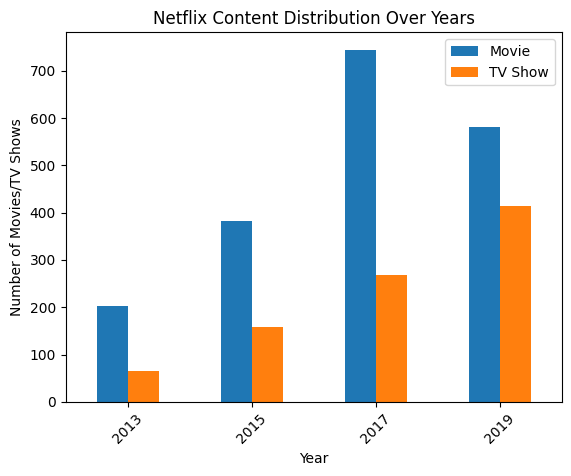

In [102]:
years = pd.DataFrame({
    'Year': [2013, 2015, 2017, 2019],
    'Movie': [202, 382, 744, 582],
    'TV Show': [65, 159, 268, 414],
})
data = years.plot(x='Year', y = ['Movie', 'TV Show'], kind = 'bar')
plt.title('Netflix Content Distribution Over Years')
plt.xticks(rotation = 45)
plt.xlabel('Year')
plt.ylabel('Number of Movies/TV Shows')


- significant increase in the number of movies added specially from 2015 - 2017
- movie decrease in 2019
- TV shows increase in 6 years alot

In [103]:
rating = netflix.groupby('rating')['rating'].count()
rating

rating
G             39
NC-17          3
NR            84
PG           247
PG-13        386
R            665
TV-14       1931
TV-G         194
TV-MA       2870
TV-PG        806
TV-Y         280
TV-Y7        271
TV-Y7-FV       6
UR             5
Name: rating, dtype: int64

In [104]:
#Categorizing the ratings into general, adult, teens, older kids (above 7)
rating_category = {
    'G':  'general',
    'NC-17': 'adult' ,
    'NR': 'adult',
    'PG': 'older kids',
    'PG-13': 'teens',
    'R': 'adult',
    'TV-14': 'teens',
    'TV-G': 'general',
    'TV-MA': 'adult',
    'TV-PG': 'older kids',
    'TV-Y': 'general' ,
    'TV-Y7': 'older kids',
    'TV-Y7-FV': 'older kids',
    'UR': 'adult',
}
netflix['rating_category'] = netflix['rating'].replace(rating_category)
netflix['rating_category'].unique()

array(['adult', 'teens', 'older kids', 'general'], dtype=object)

Text(0.5, 1.0, 'Countries with the highest number of shows')

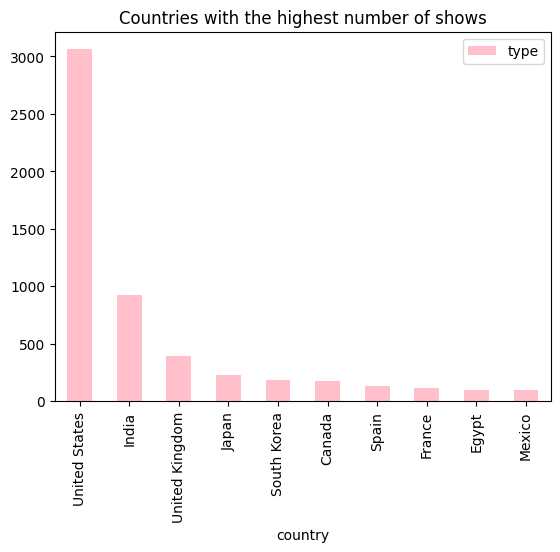

In [133]:
#Countries with the highest number of movies and shows
count = netflix.groupby('country')['type'].count().sort_values(ascending = False).head(10)
tvshow_country = count.plot(kind = 'bar', color = 'pink')
plt.legend()
plt.title('Countries with the highest number of shows')

In [138]:
netflix.head()

,type,title,country,date_added,release_year,rating,duration,listed_in,weekday_added,rating_category
0,TV Show,3%,Brazil,2020-08-14,2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",Friday,adult
1,Movie,7:19,Mexico,2016-12-23,2016,TV-MA,93 min,"Dramas, International Movies",Friday,adult
2,Movie,23:59,Singapore,2018-12-20,2011,R,78 min,"Horror Movies, International Movies",Thursday,adult
3,Movie,9,United States,2017-11-16,2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...",Thursday,teens
4,Movie,21,United States,2020-01-01,2008,PG-13,123 min,Dramas,Wednesday,teens


Text(0.5, 1.0, 'weekday tvshow/movie were released most')

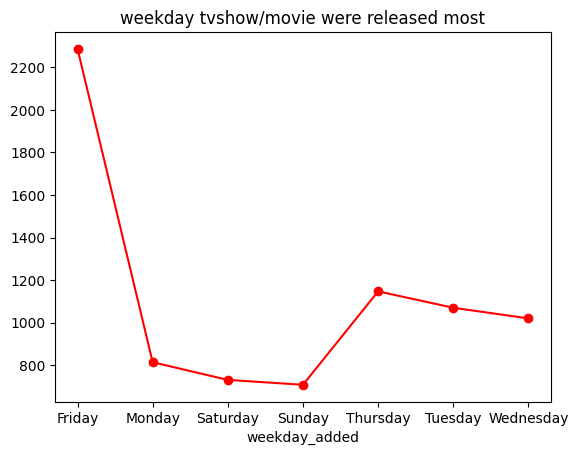

In [121]:
line = netflix.groupby('weekday_added')['type'].count()
line.plot(marker = 'o', color = 'red', linestyle = '-')
plt.title("weekday tvshow/movie were released most")

<ipython-input-139-f9dd584304d8>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  bar = sns.countplot(y="rating_category", data=netflix, palette="coolwarm",


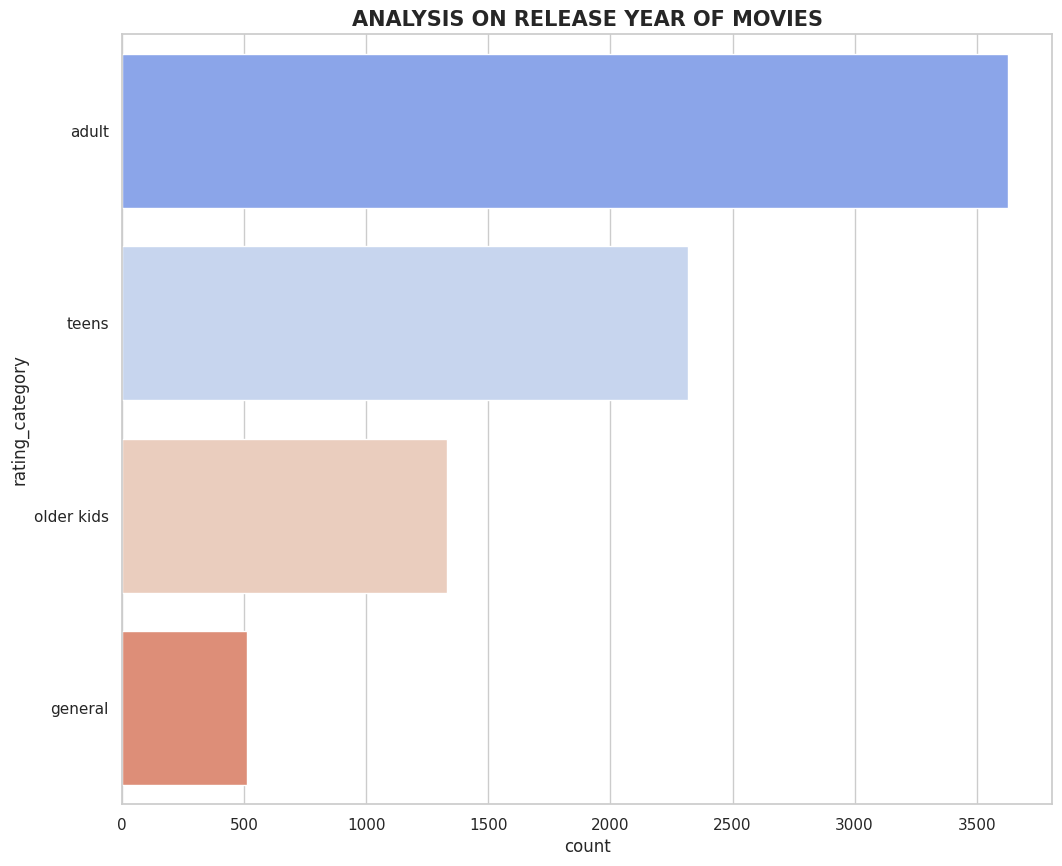

In [139]:
plt.figure(figsize=(12,10))
sns.set(style="whitegrid")
bar = sns.countplot(y="rating_category", data=netflix, palette="coolwarm",
                    order=netflix['rating_category'].value_counts().index[0:15])

plt.title('ANALYSIS ON RELEASE YEAR OF MOVIES', fontsize=15, fontweight='bold')
plt.show()

## **Prepping the Dataset**

In [66]:
netflix['country_int'] = netflix['country'].astype('category').cat.codes
netflix['rating_cat'] = netflix['rating_category'].astype('category').cat.codes
netflix['type_int'] = netflix['type'].astype('category').cat.codes
netflix['weekday_int'] = netflix['weekday_added'].astype('category').cat.codes
netflix['listed'] = netflix['listed_in'].astype('category').cat.codes
netflix['releaseyear'] = netflix['release_year'].astype('category').cat.codes
netflix.head()

,type,title,country,date_added,release_year,rating,duration,listed_in,weekday_added,rating_category,country_int,rating_cat,type_int,weekday_int,listed,realseyear,releaseyear
0,TV Show,3%,Brazil,2020-08-14,2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",Friday,adult,39,0,1,0,398,71,71
1,Movie,7:19,Mexico,2016-12-23,2016,TV-MA,93 min,"Dramas, International Movies",Friday,adult,308,0,0,0,310,67,67
2,Movie,23:59,Singapore,2018-12-20,2011,R,78 min,"Horror Movies, International Movies",Thursday,adult,379,0,0,4,336,62,62
3,Movie,9,United States,2017-11-16,2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...",Thursday,teens,549,3,0,4,47,60,60
4,Movie,21,United States,2020-01-01,2008,PG-13,123 min,Dramas,Wednesday,teens,549,3,0,6,294,59,59


## **Classification Models**

In [79]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix

In [68]:
X = netflix[['releaseyear','rating_cat', 'weekday_int', 'listed', 'country_int']]
y = netflix['type_int']
X.head()

,releaseyear,rating_cat,weekday_int,listed,country_int
0,71,0,0,398,39
1,67,0,0,310,308
2,62,0,4,336,379
3,60,3,4,47,549
4,59,3,6,294,549


In [69]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

In [87]:
#Making Classification models
names = ['Logistic Regression', 'kNN', 'SVM', 'DecisionTree']

for name in names:
  if name == 'Logistic Regression':
    name = LogisticRegression()
  elif name == 'kNN':
    name = KNeighborsClassifier()
  elif name == 'SVM':
    name = SVC()
  else:
    name = DecisionTreeClassifier()

  name.fit(X_train, y_train)
  y_pred = name.predict(X_test)
  print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Confusion Matrix:
 [[1246   71]
 [ 447  183]]
Confusion Matrix:
 [[1297   20]
 [  21  609]]
Confusion Matrix:
 [[1205  112]
 [ 341  289]]
Confusion Matrix:
 [[1314    3]
 [   1  629]]


In [93]:
logistic_regression = (1246+183) / (1246+71+447+183)
print("Logistic Regression Accuracy:", logistic_regression)

knn = (1297+609) / (1297+20+21+609)
print("KNeighbors Classifier Accuracy:", knn)

svm = (1205+289) / (1205+112+341+289)
print("SVM Accuracy:", svm)

decisiontree = (1314+629) / (1314+3+1+629)
print("Decision Tree Accuracy:", decisiontree)

Logistic Regression Accuracy: 0.733949666153056
KNeighbors Classifier Accuracy: 0.9789419619928095
SVM Accuracy: 0.7673343605546995
Decision Tree Accuracy: 0.9979455572675912
